In [19]:
import matplotlib
from pandas_datareader import data
comp_all = data.DataReader("SBER",
                      start='2019-09-1',
                      end='2019-09-30',
                      data_source='moex')
print(comp_all.head().to_string())
output = comp_all[['SECID', 'CLOSE', 'WAPRICE']]
output.index.rename('Date', inplace=True)
output.rename( columns={'SECID':'Company',
                        'CLOSE':'Close_Price',
                        'WAPRICE':'Open_Price'}
              , inplace=True)
print(output)
#

            ADMITTEDQUOTE  ADMITTEDVALUE  BEICLOSE  BID BOARDID BOARDNAME  BUYBACKDATE  CBRCLOSE   CLOSE CLOSEAUCTIONPRICE CLOSEPERIOD CLOSEVAL  COUPONPERCENT  COUPONVALUE CURRENCYID DAILYCAPITALIZATION  DECIMALS FACEUNIT  FACEVALUE    HIGH HIGHBID  IRICPICLOSE ISIN ISSUESIZE LASTPRICE LASTTRADEDATE  LEGALCLOSEPRICE LEGALOPENPRICE LISTNAME     LOW LOWOFFER MARKETPRICE  MARKETPRICE2  MARKETPRICE3 MARKETPRICE3CUR  MARKETPRICE3TRADESVALUE MARKETPRICE3TRADESVALUECUR MONTHLYCAPITALIZATION  MP2VALTRD MPVALTRD  NUMBID  NUMOFFER  NUMTRADES  OFFER  OFFERDATE    OPEN OPENPERIOD OPENVAL PREV PREVLEGALCLOSEPRICE REGNUMBER SECID SHORTNAME  TRADINGSESSION TRENDCLOSE TRENDCLSPR TRENDWAP TRENDWAPPR TYPE        VALUE     VOLUME  WAPRICE  WAVAL  YIELDLASTCOUPON  YIELDTOOFFER
TRADEDATE                                                                                                                                                                                                                               

C:\Users\ilyazharkov\PycharmProjects\Pandas_Reader_Sample\venv\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
comp_all.query('BOARDID == "TQBR"', inplace=True)
print(comp_all.to_string())



            ADMITTEDQUOTE  ADMITTEDVALUE  BEICLOSE  BID BOARDID BOARDNAME  BUYBACKDATE  CBRCLOSE   CLOSE CLOSEAUCTIONPRICE CLOSEPERIOD CLOSEVAL  COUPONPERCENT  COUPONVALUE CURRENCYID DAILYCAPITALIZATION  DECIMALS FACEUNIT  FACEVALUE    HIGH HIGHBID  IRICPICLOSE ISIN ISSUESIZE LASTPRICE LASTTRADEDATE  LEGALCLOSEPRICE LEGALOPENPRICE LISTNAME     LOW LOWOFFER MARKETPRICE  MARKETPRICE2  MARKETPRICE3 MARKETPRICE3CUR  MARKETPRICE3TRADESVALUE MARKETPRICE3TRADESVALUECUR MONTHLYCAPITALIZATION     MP2VALTRD MPVALTRD  NUMBID  NUMOFFER  NUMTRADES  OFFER  OFFERDATE    OPEN OPENPERIOD OPENVAL PREV PREVLEGALCLOSEPRICE REGNUMBER SECID SHORTNAME  TRADINGSESSION TRENDCLOSE TRENDCLSPR TRENDWAP TRENDWAPPR TYPE         VALUE      VOLUME  WAPRICE  WAVAL  YIELDLASTCOUPON  YIELDTOOFFER
Date                                                                                                                                                                                                                               

In [21]:
comp = comp_all['WAPRICE']
comp.drop_duplicates(keep=False, inplace=True)
print(comp.to_string())


Date
2019-09-02    226.28
2019-09-03    223.69
2019-09-04    226.08
2019-09-05    229.75
2019-09-06    229.63
2019-09-09    229.07
2019-09-10    231.84
2019-09-11    234.43
2019-09-12    234.22
2019-09-13    233.39
2019-09-16    234.77
2019-09-17    235.40
2019-09-18    235.46
2019-09-19    234.47
2019-09-20    232.22
2019-09-23    230.11
2019-09-24    229.72
2019-09-25    226.78
2019-09-26    229.46
2019-09-27    228.98
2019-09-30    227.43


<AxesSubplot:title={'center':'AAPL Adj. Closing Price'}, xlabel='Date'>

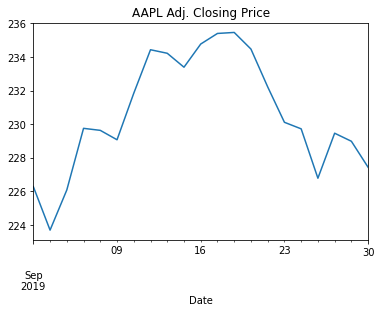

In [22]:
comp.plot(kind='line', x='TRADEDATE', y='WAPRICE', title='AAPL Adj. Closing Price')

In [23]:
import Subroutines.Smooth as subr
smooth = subr.savitzky_golay(comp.values, 51, 10)
print(smooth[:10])

[230.5663674  231.85315586 232.98617667 233.84993181 234.62522159
 234.90313761 234.7298009  234.30069948 233.60963526 232.56399861]


[1.5673824e+18 1.5674688e+18 1.5675552e+18 1.5676416e+18 1.5677280e+18
 1.5679872e+18 1.5680736e+18 1.5681600e+18 1.5682464e+18 1.5683328e+18]
[0.         0.75539568 1.51079137 2.26618705 3.02158273 5.28776978
 6.04316547 6.79856115 7.55395683 8.30935252]


ValueError: x and y must have same first dimension, but have shapes (21,) and (11,)

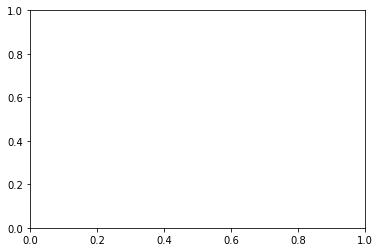

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = comp.keys()
xfloat = x.values.astype(float)
print(xfloat[:10])
minx = np.amin(xfloat)
xfloat = xfloat - minx
xfloat = xfloat / ( np.mean(xfloat) / 10.)
print(xfloat[:10])
plt.plot(xfloat, smooth)
plt.show()

In [ ]:
#import Subroutines.Approximation as ap
#approximated = ap.approximation_polynomial(xfloat, smooth, dist=2, rate=5)
weights = np.polyfit(x=xfloat, y=smooth, deg=125)
approximated = np.polyval(weights, xfloat)
plt.plot(xfloat, smooth, label='smooth')
plt.plot(xfloat, approximated, label='approximated')
plt.show()